In [15]:
# Importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Loading data
df=pd.read_excel('AIR_DELHI.xlsx')
# printing first 10 rows
print(df.head(10))
# Checking data types
print(df.dtypes)
print('\nYour data is loaded successfully.Get your hands dirty on it')

        Date  Holidays_Count  Days   PM2.5    PM10     NO2    SO2    CO  \
0 1906-07-14               0     5  408.80  442.42  160.61  12.95  2.77   
1 1907-07-14               0     6  404.04  561.95   52.85   5.18  2.60   
2 1908-07-13               1     7  225.07  239.04  170.95  10.93  1.40   
3 1909-07-13               0     1   89.55  132.08  153.98  10.42  1.01   
4 1910-07-14               0     2   54.06   55.54  122.66   9.70  0.64   
5 1911-07-14               0     3  155.59  180.14  142.71  10.29  1.18   
6 1912-07-13               0     4  118.39  131.18   98.87   9.81  0.73   
7 1913-07-13               0     5  140.05  184.29  102.61  10.34  0.79   
8 1914-07-14               0     6  144.01  192.43  108.43  10.41  0.85   
9 1915-07-14               1     7  131.57  180.38   93.31   9.92  0.69   

   Ozone    AQI  
0  43.19  462.0  
1  16.43  482.0  
2  44.29  263.0  
3  49.19  207.0  
4  48.88  149.0  
5  44.47  252.0  
6  48.60  288.0  
7  43.06  248.0  
8  42.23  32

In [35]:
# Handling missing values
col_values=['PM2.5','PM10','NO2','SO2','CO','AQI','Ozone']
average_values=df[col_values].mean().round(1)
# Check missing values
print(f"Missing values:\n{df[col_values].isnull().sum()}")
df[col_values]=df[col_values].fillna(average_values)
print(f"Missing values:\n{df[col_values].isnull().sum()}")
print(average_values)

Missing values:
PM2.5    2
PM10     2
NO2      3
SO2      1
CO       3
AQI      1
Ozone    3
dtype: int64
Missing values:
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
AQI      0
Ozone    0
dtype: int64
PM2.5     90.7
PM10     218.4
NO2       37.1
SO2       20.1
CO         1.0
AQI      202.2
Ozone     36.3
dtype: float64


In [ ]:
# Data Exploration. Understanding my data more
print('Understanding our Data in a Nutshell')
print(f"\nTotal rows of dataset:{len(df)}")
summary=df[['PM2.5','PM10','NO2','SO2','CO','AQI','Ozone']].describe().round(1)
print(f"\n Our summary Statistics:\n{summary}")
# Printing averages to understand outliers
cols=['PM2.5','PM10','NO2','SO2','CO','AQI','Ozone']
average=df[cols].mean().round(1)
print(f"\nAverages:\n{average}")
# pollutant  highest on average from the results below the N02 is the highest



Understanding our Data in a Nutshell

Total rows of dataset:1461

 Our summary Statistics:
        PM2.5    PM10     NO2     SO2      CO     AQI   Ozone
count  1461.0  1461.0  1461.0  1461.0  1461.0  1461.0  1461.0
mean     90.7   218.4    37.1    20.1     1.0   202.2    36.3
std      71.5   129.2    35.2    16.5     0.6   107.8    18.9
min       0.0     9.7     2.2     1.2     0.3    19.0     2.7
25%      41.3   115.2    17.3     7.7     0.6   108.0    24.1
50%      72.1   200.3    30.5    15.5     0.8   189.0    32.5
75%     118.4   297.8    45.0    26.6     1.2   284.0    45.7
max    1000.0  1000.0   434.0   113.4     4.7   500.0   115.9

Averages:
PM2.5     90.7
PM10     218.4
NO2       37.1
SO2       20.1
CO         1.0
AQI      202.2
Ozone     36.3
dtype: float64


In [ ]:
# Group analysis for our data into seasons to gain more insights
df['Month']=df['Date'].dt.month
# Defining seasons
def get_season(month):
    """Assigns various months based on which season they are"""
    if month in [12,1,2,3]:
        return'Winter'
    elif month in [4,5,6]:
        return'Summer'
    else:
        return 'Other'

df['Season'] = df['Month'].apply(get_season)
# Printing first 10 rows
print(df.head(10))
winter_avg=df.loc[df['Season']=='Winter','PM2.5'].mean().round(2)
summer_avg=df.loc[df['Season']=='Summer','PM2.5'].mean().round(2)
other_avg=df.loc[df['Season']=='Other','PM2.5'].mean().round(2)
print(f"\nAverage value for months in Summer only: {winter_avg}")
print(f"\nAverage value for months in Summer only: {summer_avg}")
print(f"\nAverage value for months in Other only: {other_avg}")
# In Summer pollution is so high

        Date  Holidays_Count  Days   PM2.5    PM10     NO2    SO2    CO  \
0 1906-07-14               0     5  408.80  442.42  160.61  12.95  2.77   
1 1907-07-14               0     6  404.04  561.95   52.85   5.18  2.60   
2 1908-07-13               1     7  225.07  239.04  170.95  10.93  1.40   
3 1909-07-13               0     1   89.55  132.08  153.98  10.42  1.01   
4 1910-07-14               0     2   54.06   55.54  122.66   9.70  0.64   
5 1911-07-14               0     3  155.59  180.14  142.71  10.29  1.18   
6 1912-07-13               0     4  118.39  131.18   98.87   9.81  0.73   
7 1913-07-13               0     5  140.05  184.29  102.61  10.34  0.79   
8 1914-07-14               0     6  144.01  192.43  108.43  10.41  0.85   
9 1915-07-14               1     7  131.57  180.38   93.31   9.92  0.69   

   Ozone    AQI  Month Season  
0  43.19  462.0      7  Other  
1  16.43  482.0      7  Other  
2  44.29  263.0      7  Other  
3  49.19  207.0      7  Other  
4  48.88  149.

        PM2.5    PM10    NO2    SO2    CO     AQI  Ozone
Month                                                   
1       38.11   91.08  28.61  19.06  0.67   90.35  41.05
2       33.77   95.05  29.15  22.44  0.56   89.79  36.93
3       33.16   89.53  25.57  19.32  0.63   87.30  34.87
4       79.52  211.92  42.96  20.73  0.98  191.64  30.80
5      154.89  387.51  65.60  24.19  1.86  342.13  24.69
6      133.13  339.06  44.21  22.98  1.43  297.27  29.49
7      155.54  292.94  45.43  11.20  1.38  305.87  26.70
8      108.28  241.30  46.07  11.90  1.18  239.73  26.26
9       86.87  220.54  28.62  15.23  0.88  200.13  35.13
10     101.57  253.84  30.54  37.85  1.05  222.35  55.92
11      87.60  213.52  27.77  20.15  0.95  199.72  48.09
12      77.26  187.69  32.23  16.11  0.76  163.98  45.65


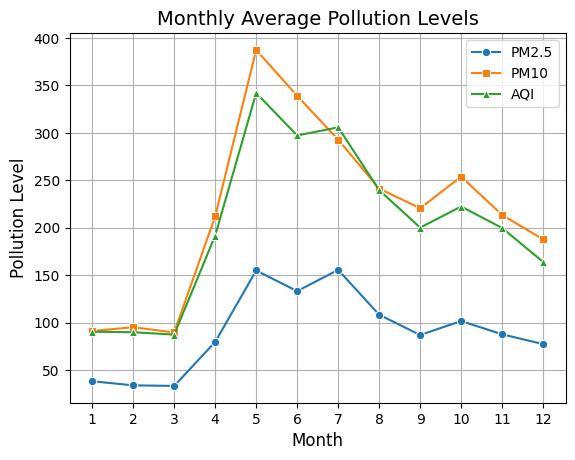

In [64]:
# Identifying patterns
monthly_avg=df.groupby('Month')[['PM2.5','PM10','NO2','SO2','CO','AQI','Ozone']].mean().round(2)
print(monthly_avg)

# Visualizing it to make sense
plt.Figure(figsize=(10,5))
sns.lineplot(data=monthly_avg, x='Month', y='PM2.5', marker='o', label="PM2.5")
sns.lineplot(data=monthly_avg, x='Month', y='PM10', marker='s', label="PM10")
sns.lineplot(data=monthly_avg, x='Month', y='AQI', marker='^', label="AQI")
plt.title('Monthly Average Pollution Levels', fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Pollution Level',fontsize=12)
plt.xticks(range(1,13))
plt.legend()
plt.grid(True)
plt.show()

          AQI
Month        
1       90.35
2       89.79
3       87.30
4      191.64
5      342.13
6      297.27
7      305.87
8      239.73
9      200.13
10     222.35
11     199.72
12     163.98


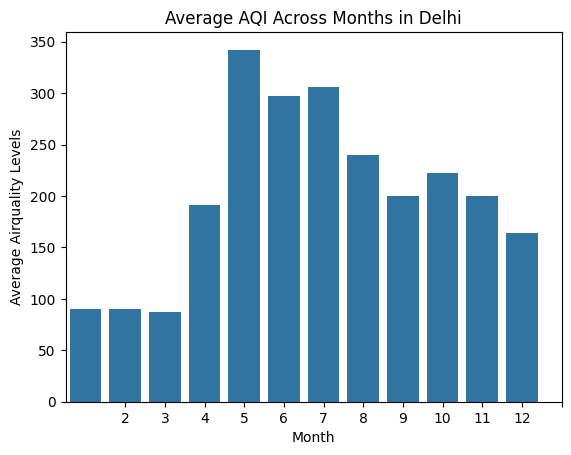

In [68]:
# Comparing AQI against months to understand which months have the worst air quality
monthly_AQI_avg=df.groupby('Month')[['AQI']].mean().round(2)
print(monthly_AQI_avg)

# Visualizing on a Barchart
plt.Figure(figsize=(10,5))
sns.barplot(data=monthly_AQI_avg, x='Month',y='AQI')
plt.title('Average AQI Across Months in Delhi')
plt.xlabel('Month')
plt.ylabel('Average Airquality Levels')
plt.xticks(range(1,13))
plt.grid(False)
plt.show()

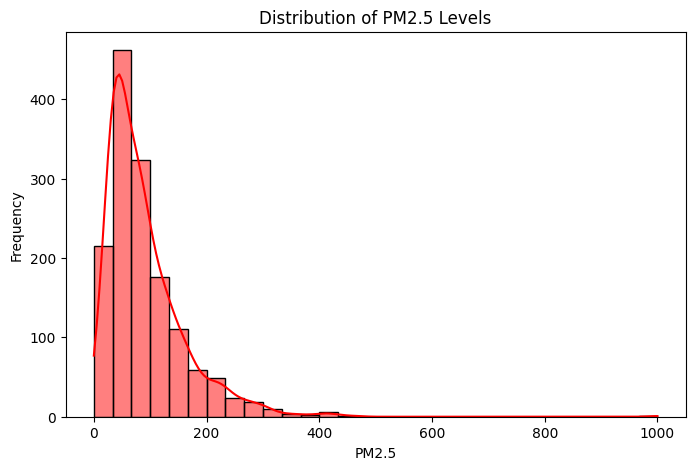

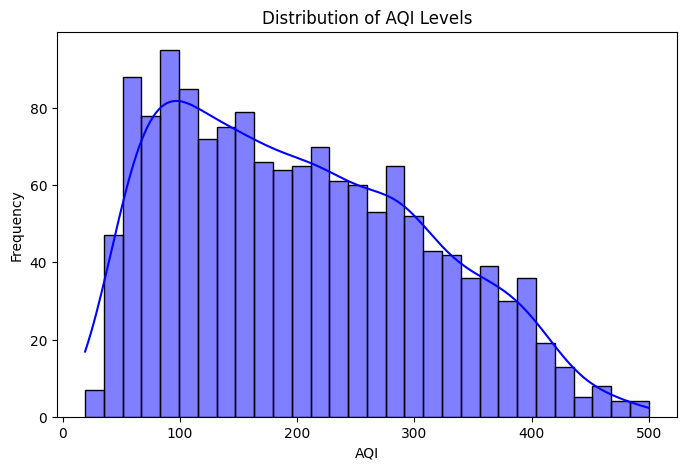

In [69]:
# Distribution of pollution Levels
# Helps see if most days are Moderate, Poor, or Severe.
# Histogram for PM2.5
plt.figure(figsize=(8,5))
sns.histplot(df['PM2.5'], bins=30, kde=True, color='red')
plt.title("Distribution of PM2.5 Levels")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

# Histogram for AQI
plt.figure(figsize=(8,5))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title("Distribution of AQI Levels")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

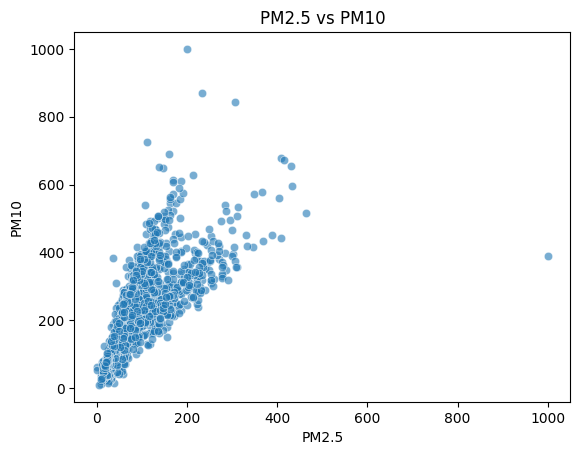

In [73]:
# Relationship Between Pollutants
# Check if pollutants rise together (high correlation).
plt.Figure(figsize=(8,5))
sns.scatterplot(x=df['PM2.5'], y=df['PM10'], alpha=0.6)
plt.title('PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()


=== AQI Prediction Report ===
R² Score: 0.84
Mean Absolute Error (MAE): 27.46
Root Mean Squared Error (RMSE): 42.43


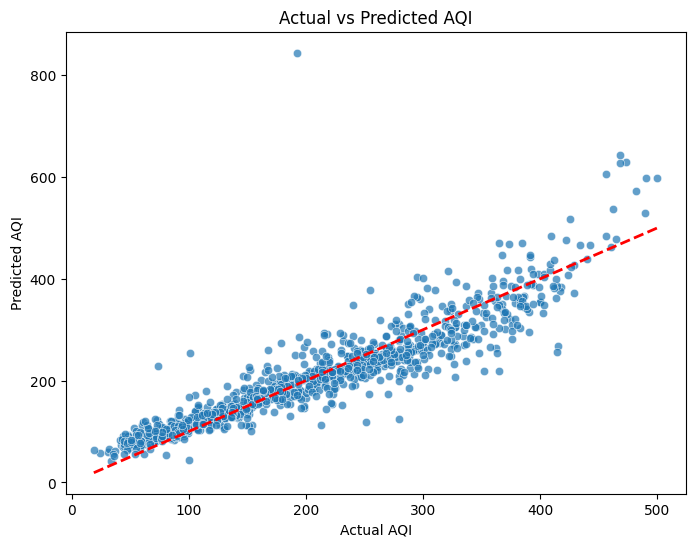

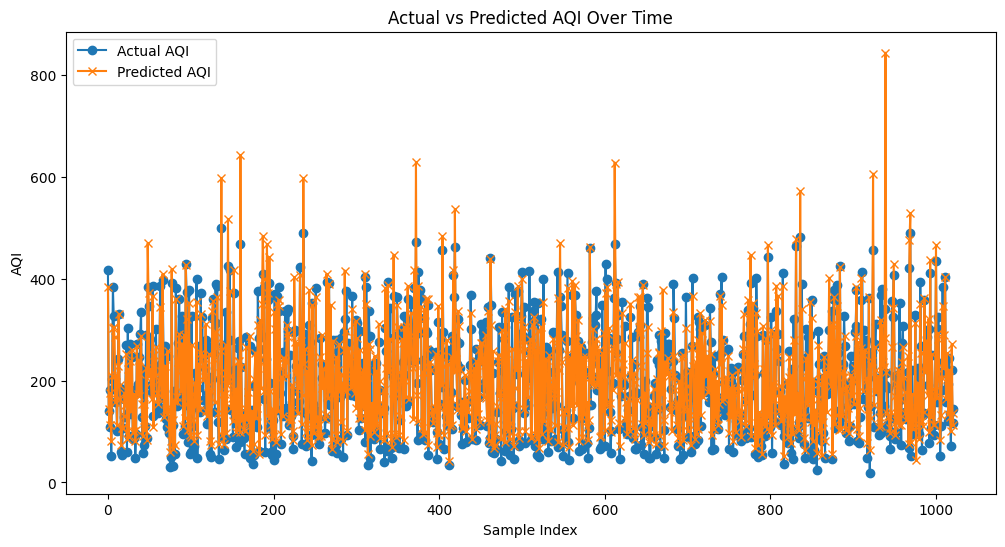

In [76]:
# Creating a model to predict AQI based on pollutants
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Defining my features target
y=df['AQI']
X=df[['PM2.5','PM10','NO2','SO2','CO','Ozone']]

# Splitting my data
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3, random_state=42)
# Coosing and training my model
model=LinearRegression()
model.fit(X_train,y_train)
# Testing my model
y_pred=model.predict(X_test)

# Printing model report
print("\n=== AQI Prediction Report ===")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Scatter Plot: Actual vs Predicted -
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

# Line Plot: Over Time (using index)
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual AQI", marker='o')
plt.plot(y_pred, label="Predicted AQI", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("AQI")
plt.title("Actual vs Predicted AQI Over Time")
plt.legend()
plt.show()

In [ ]:
# key findings and Insights
# 1. Seasonal Variation: Pollution levels, especially PM2.5, are significantly higher in winter months (Dec-Mar) compared to summer (Apr-Jun) and other months. This indicates seasonal factors like temperature inversions and increased emissions during winter.
# 2. Monthly Trends: The line plots show clear monthly trends in pollution levels, with peaks in certain months. This can help in planning interventions during high pollution periods.
# 3. AQI Distribution: The histogram of AQI levels indicates that a substantial number of days fall into the 'Poor' and 'Very Poor' categories, highlighting the need for air quality management strategies.